# Script Bash

Os arquivos de turmas e matriculas são divididos em períodos. Este script cria diretórios e os move para os respectivos diretórios

In [0]:
!mkdir -p turmas
!mkdir -p matriculas
!mv turmas*.csv turmas/
!mv matriculas*.csv matriculas/

# Seleção de Componentes

Seleciona os componentes desejados, extraindo-os de `componentes.csv`.
Especificamente, a matéria desejada (Álgebra Linear) possui código MAT0309.
Esse código é usado tanto para selecionar a própria disciplina (`al_comp`) quanto para selecionar as disciplinas que dependem dela (`dependentes`).

In [0]:
import pandas as pd
import re

componentes = pd.read_csv("componentes.csv", sep=';', error_bad_lines=False)

componentes = componentes[componentes['nome'].notna()]
componentes = componentes[componentes['pre_requisito'].notna()]
#componentes = componentes[componentes['nome'].str.contains('linear', case=False)]
#MAT0309

#drops unecessary columns
componentes = componentes.drop(columns=['ch_teorico', 'ch_pratico',
                                       'ch_estagio', 'ch_total', 'ch_dedicada_docente',
                                       'ch_ead', 'cr_max_ead', 'permite_horario_flexivel',
                                       'qtd_unidades', 'procedimentos_avaliacao',
                                       'ementa', 'conteudo', 'competencias_habilidades',
                                       'ano_programa', 'modalidade', 'curso_componente',
                                       'referencias', 'bibliografia', 'objetivos', 'Unnamed: 29'])

#selects algebra linear para computação
al_codigo = 'MAT0309'

al_comp = componentes[componentes['codigo'] == al_codigo]
al_comp['id_componente'] = al_comp['id_componente'].astype('int32')

dependentes = componentes[componentes['pre_requisito'].str.contains(al_codigo)]
dependentes['id_componente'] = dependentes['id_componente'].astype('int32')

dependentes

b'Skipping line 8475: expected 30 fields, saw 33\nSkipping line 11978: expected 30 fields, saw 33\nSkipping line 11986: expected 30 fields, saw 31\nSkipping line 12281: expected 30 fields, saw 37\nSkipping line 12561: expected 30 fields, saw 34\nSkipping line 15331: expected 30 fields, saw 38\nSkipping line 15756: expected 30 fields, saw 34\nSkipping line 19270: expected 30 fields, saw 31\nSkipping line 21144: expected 30 fields, saw 31\nSkipping line 25719: expected 30 fields, saw 31\nSkipping line 25742: expected 30 fields, saw 34\nSkipping line 27670: expected 30 fields, saw 37\nSkipping line 28966: expected 30 fields, saw 31\nSkipping line 28967: expected 30 fields, saw 31\nSkipping line 31168: expected 30 fields, saw 32\nSkipping line 31472: expected 30 fields, saw 34\nSkipping line 31505: expected 30 fields, saw 36\n'
b'Skipping line 36017: expected 30 fields, saw 33\nSkipping line 36063: expected 30 fields, saw 34\nSkipping line 38672: expected 30 fields, saw 31\nSkipping line 3

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,equivalencia,pre_requisito,co_requisito,periodo_programa
5302,23558,DISCIPLINA,DIM0404,G,CALCULO NUMERICO PARA CIENCIA DA COMPUTACAO,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,( DIM0040 ),( ( MAT0312 OU MAT0346 ) E ( MAT0343 ) ) OU ( ...,NaN,1
38462,2040950,DISCIPLINA,DIM0451,G,COMPUTAÇÃO GRÁFICA I,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,( DIM0435 ) OU ( DIM0102 ) OU ( DCA0114 ),( DIM0404 ) OU ( IMD0024 E IMD0039 E MAT0309 E...,NaN,1


# Seleção de Turmas

Seleciona todas as turmas de 2014 até 2018 que têm alguma relação com Álgebra Linear: Álgebra Linear, Cálculo Numérico e Computação Gráfica. As informações das turmas estão separados em 10 arquivos diferentes. Todos eles são lidos e juntados num único dataframe após a limpeza dos dados. Tal limpeza envolve remoção de colunas desnecessárias, remoção de linhas inválidas, remoção de duplicatas e remoção de turmas não correspondentes às citadas inicialmente.

In [0]:
#reads all classes from 2014 to 2018
turmas_by_sem = {}
semesters = ['2014.1', '2014.2', '2015.1', '2015.2',
            '2016.1', '2016.2', '2017.1', '2017.2',
            '2018.1', '2018.2']
for sem in semesters:
  turmas_by_sem[sem] = pd.read_csv('turmas/turmas-' + sem + '.csv', sep=";")
  
  #cleans data
  turmas_by_sem[sem] = turmas_by_sem[sem][turmas_by_sem[sem]['id_componente_curricular'].notna()]
  turmas_by_sem[sem]['id_componente_curricular'] = turmas_by_sem[sem]['id_componente_curricular'].astype('int32')
  
  #filters desired classes
  turmas_by_sem[sem] = turmas_by_sem[sem][(turmas_by_sem[sem]['id_componente_curricular'] ==
      int(al_comp['id_componente'])) |
      (turmas_by_sem[sem]['id_componente_curricular'].isin(
      dependentes['id_componente'].tolist()) )]
  
  #removes unecessary columns
  turmas_by_sem[sem] = turmas_by_sem[sem].drop(columns=['id_docente_interno',
                           'id_docente_externo', 'observacao', 'nivel_ensino',
                           'campus_turma', 'data_inicio', 'data_fim',
                           'descricao_horario', 'total_solicitacoes',
                           'capacidade_aluno', 'tipo', 'distancia',
                           'data_consolidacao', 'agrupadora',
                           'id_turma_agrupadora', 'qtd_aulas_lancadas',
                           'situacao_turma', 'convenio',
                           'modalidade_participantes'])
  if 'Unnamed: 25' in turmas_by_sem[sem].columns:
    turmas_by_sem[sem] = turmas_by_sem[sem].drop(columns=['Unnamed: 25'])
  
#merges tables
turmas = pd.concat(turmas_by_sem)
turmas = turmas.drop_duplicates()
turmas['id_turma'] = turmas['id_turma'].astype('int64')
turmas

id_turma codigo_turma  id_componente_curricular          local  \
2014.1 9169    1224062           01                   2040950            3H6   
2014.2 7362    1233555           01                     55325            3B1   
2015.1 4727    1241767           01                     23558            3D6   
       4759    1241801           01                   2040950            3G1   
2015.2 1433   57563844           01                     55325            3G4   
2016.1 3190   57575206           01                     23558            3C4   
       3229   57575229           01                   2040950            3B2   
2016.2 1951   57585054           01                     55325            3A4   
       4073   57586713           01                   2040950            3B6   
2017.1 3226   57595841           01                     55325            3E4   
       4408   57596650           01                     23558            3B2   
2017.2 4032   57605277           01                     55325            3A3   
       6930   57606923           01                   2040950    A303 - CIVT   
2018.1 1274   57614072           01                     23558           LCC2   
       2070   57614681           01                     55325            3B2   
2018.2 7851   57628510           01                     55325            3B2   
       10528  57630159           01                   2040950  LCC 3 - DIMAP   

               ano  periodo  
2014.1 9169   2014      1.0  
2014.2 7362   2014      2.0  
2015.1 4727   2015      1.0  
       4759   2015      1.0  
2015.2 1433   2015      2.0  
2016.1 3190   2016      1.0  
       3229   2016      1.0  
2016.2 1951   2016      2.0  
       4073   2016      2.0  
2017.1 3226   2017      1.0  
       4408   2017      1.0  
2017.2 4032   2017      2.0  
       6930   2017      2.0  
2018.1 1274   2018      1.0  
       2070   2018      1.0  
2018.2 7851   2018      2.0  
       10528  2018      2.0

# Seleção de Alunos/Notas

À partir dos arquivos das matrículas realizadas de 2014 até 2018, é possível associar cada matrícula com uma turma.
Semelhante à etapa anterior, os dados são filtrados e limpados (remoção de colunas irrelevantes ou inválidas, seleção de alunos que participaram em turmas presentes no dataframe `turmas`) e posteriormente unidos num único dataframe.

A partir das colunas `notas` e `descricao`, extrai-se, respectivamente, a nota do aluno e o status na disciplina (aprovado, reprovado, etc.).

In [0]:
#selects students that participated in the previous selected classes

#reads all classes from 2014 to 2018
matr_by_sem = {}

for sem in semesters:
  matr_by_sem[sem] = pd.read_csv('matriculas/matriculas-' + sem + '.csv', sep=";")
  
  #cleans data
  matr_by_sem[sem] = matr_by_sem[sem][matr_by_sem[sem]['id_turma'].notna()]
  
  #filters desired students by class
  matr_by_sem[sem] = matr_by_sem[sem][matr_by_sem[sem]['id_turma'].isin(
    turmas['id_turma'].tolist())]
  
  #removes unecessary columns
  matr_by_sem[sem] = matr_by_sem[sem].drop(columns=['id_curso', 'unidade', 'nota',
                                                    'faltas_unidade', 'numero_total_faltas',
                                                   'reposicao'])
  if 'Unnamed: 10' in matr_by_sem[sem].columns:
    matr_by_sem[sem] = matr_by_sem[sem].drop(columns=['Unnamed: 10'])
    
  #recleans data
  matr_by_sem[sem] = matr_by_sem[sem].drop_duplicates()
  
#merges tables
notas = pd.concat(matr_by_sem)
notas

id_turma                          discente  media_final  \
2014.1 93069    1224062  90f93a380e665c7381e6e71880345439          5.3   
       93072    1224062  8f3c0637225e552b2e4a9c080ea38641          5.4   
       93075    1224062  0a3c31f60f35f8e1f4ad128088ddfb22          6.7   
       93078    1224062  fbe666a34082928a52ad673614eb256c          5.6   
       93081    1224062  263bfba2018ff5a69572b05c123f8b0d          0.2   
       93084    1224062  03a50b6995a5d0f44f456ef9bf635198          1.1   
       93087    1224062  1249983e72286929a13c00eee411ad74          NaN   
       93090    1224062  29fa3e5c682b01ff99e2a8979b5c51ab          7.4   
       93093    1224062  5594d529bbb25c1bf430866fa0fb66ed          6.6   
       93096    1224062  f380da65a5783f0c58f9e48599e0a184          2.2   
       93099    1224062  5d59f8423ad706a892ec7fa6ac8066e8          1.1   
       444333   1224062  98b2f41a8b0e890afd4a21bd4a14d295          6.1   
       444336   1224062  06657effcfc09583142713924d4ab110          NaN   
       444339   1224062  f589606e8752db72fb958536481cd6c9          0.0   
       444342   1224062  9f544068a5d39e41266c553138167d30          NaN   
       444345   1224062  cf56f4068e34fff3ae346e54c9fec6c2          NaN   
       444348   1224062  28009a8d6834cc0540b60bf2ead58652          1.3   
       444351   1224062  65f4e1175eecfb9b3a934d5a8fc6dd14          1.2   
       444354   1224062  28787e6a8fd9abd82cbc3f18e12b15d6          0.0   
       444357   1224062  bfbc8e3a5dd1a9e3a1353d10556d209f          8.4   
2014.2 103574   1233555  d2ebea0c1ebded5adcf2e6eb2d919b9a          NaN   
       103575   1233555  d2ebea0c1ebded5adcf2e6eb2d919b9a          9.9   
       103578   1233555  7571ec1db03f11e42635430e58b95cee          NaN   
       103579   1233555  7571ec1db03f11e42635430e58b95cee          9.5   
       103582   1233555  dfc0b8035c1c5931710e65e92d91aa30          NaN   
       103583   1233555  098328a35e4c60b120e4bb6b94c8a0f6          NaN   
       103584   1233555  dfc0b8035c1c5931710e65e92d91aa30          NaN   
       103585   1233555  098328a35e4c60b120e4bb6b94c8a0f6          7.4   
       103588   1233555  bc2bc7b8d6d7550aeaf952fd146e716e          NaN   
       103589   1233555  bc2bc7b8d6d7550aeaf952fd146e716e          8.0   
...                 ...                               ...          ...   
2018.2 214169  57630159  21225dc7439a0fa0c7daba69208ea8ce          NaN   
       214172  57630159  736b02f7e21fadd7be4b5e2c8e3220cc          NaN   
       214175  57630159  6401cd0b1d6149505a61cdb3ba93d434          NaN   
       214178  57630159  9d78bef9cf3602ea7e25f55cf79ae0db          NaN   
       412240  57628510  fc72d8ee796c35244b10adcfa1847eda          NaN   
       412243  57628510  1deed8f21a895fa8446751ffd0b079f6          NaN   
       412246  57628510  de9d615d60689d6ea25c984ce8879c0b          NaN   
       412249  57628510  9684b8e9ace5dcd5c4c29bf4f21d2185          NaN   
       412252  57628510  8e0a9c44006f9688ba76a1d30c612ad3          NaN   
       412255  57628510  5b89769f8ea128b937295de4981075c7          NaN   
       412258  57628510  1083bef2aa3cadf999bdbf2c3d7b98ca          NaN   
       412259  57628510  510e4f65de9f56e60a029de589d395a1          NaN   
       412262  57628510  277830ff25b2d893a214d8e0c1bee0e4          NaN   
       412265  57628510  b8e335be901f65af90c2b5fc074357a4          NaN   
       412268  57628510  47e0a38b24fe1ff3dce2d3da5fb2eb9e          NaN   
       412269  57628510  00451143ff85cced810a59ae7dcc61e6          NaN   
       412272  57628510  6caf49fdb54c8eefcef753a4f29e68e0          NaN   
       412275  57628510  ca8909ce80b7ed85b87125c293a5f366          NaN   
       412278  57628510  169d05c942ca7ab1fe5f4fed41873fb2          NaN   
       412281  57628510  0de7678ddb2772b5d052364c45fc73fa          NaN   
       412284  57628510  cc45c845f764c7be86f3959bffec4495          NaN   
       412287  57628510  ff8c8ca5426dccb18dceaad6c00c6306          NaN   
       525471  5763

# Separação de Matérias e Manipulação de Dados
Separa as disciplinas em dois data frames: um contendo as notas de Álgebra Linear (`al_notas`) e as notas de outras disciplinas (`other_notas`).  Note que para a presente análise, filtra-se apenas os alunos que foram **aprovados** em Álgebra Linear e que cursaram alguma disciplina dependente posteriormente.

Após limpar os dados, une-se ambos os dataframes num único, contendo duplicatas dos alunos de Álgebra Linear caso tenham cursado mais de uma disciplina dependente da mesma.
É adicionada uma nova coluna `time_dela` para analisar o impacto que o tempo entre cursar a disciplina base e a posterior causa.

In [0]:
#selects linear algebra classes
al_class = turmas[turmas['id_componente_curricular'] == int(al_comp['id_componente'])]

#selects remaining classes
other_class = turmas[turmas['id_componente_curricular'] != int(al_comp['id_componente'])]

#separates notes in linear algebra and other classes
al_notas = notas[notas['id_turma'].isin(al_class['id_turma'].tolist())]
other_notas = notas[notas['id_turma'].isin(other_class['id_turma'].tolist())]

#selects linear algebra studentes that passed
al_notas = al_notas[al_notas['descricao'].str.contains('aprovado', case=False)]

#drops unnecessary columns
al_notas = al_notas.drop(columns=['descricao'])
#other_notas = other_notas.drop(columns=['descricao'])

#cleans data
other_notas = other_notas.dropna()

#prepares data for scatter plot
#pd.concat([al_notas, other_notas]).sort_values(by='discente')
res = pd.merge(al_notas, other_notas, on='discente', how='inner')

#computes time delta
turma_time = turmas[['id_turma', 'ano', 'periodo']]
res = pd.merge(res, turma_time, left_on='id_turma_x', right_on='id_turma')
res = pd.merge(res, turma_time, left_on='id_turma_y', right_on='id_turma')
res = res.loc[:,~res.columns.duplicated()]
res['time_delta'] = (res['ano_y'].astype('float') + (res['periodo_y'].astype('float') - 1)/2)
res['time_delta'] -= (res['ano_x'].astype('float') + (res['periodo_x'].astype('float') - 1)/2)
res['time_delta'] = (res['time_delta'] * 2).astype('int32')
res = res.drop(columns=['ano_x', 'periodo_x', 'ano_y', 'periodo_y'])
res

,id_turma_x,discente,media_final_x,id_turma_y,media_final_y,descricao,time_delta
0,1233555,d2ebea0c1ebded5adcf2e6eb2d919b9a,9.9,57575206,9.3,APROVADO,3
1,1233555,bc2bc7b8d6d7550aeaf952fd146e716e,8.0,57575206,5.4,APROVADO POR NOTA,3
2,1233555,ac15394f332cd690a1f81161dddf8620,6.3,57575206,5.1,APROVADO POR NOTA,3
3,57563844,abaac7a4a42d03417f81b1455442607a,5.6,57575206,6.0,APROVADO POR NOTA,1
4,57563844,2a972fdb2041099e5328733757678e82,8.3,57575206,7.5,APROVADO,1
5,57563844,14542d2e5794c28be6a38a0f921d3229,8.1,57575206,6.0,APROVADO POR NOTA,1
6,57563844,f5d92d4830c68497a8fb9d3c45b5021d,5.4,57575206,2.3,REPROVADO,1
7,57563844,290f0b6d3d787b505e16ee47aad36eae,8.8,57575206,7.0,APROVADO,1
8,57563844,5a5d94d46b85d1bec85b6a0b0a0b826b,7.3,57575206,6.4,APROVADO POR NOTA,1
9,57563844,480a730ca3e8657e4d203f06d6baaae1,6.0,57575206,5.1,APROVADO POR NOTA,1


# Geração de Gráficos

Um Scatter plot é gerado. O eixo x corresponde às notas de Álgebra Linear e o eixo y às notas das disciplinas dependentes.

A linha verde representa a função f(x) = x. Ou seja, caso um aluno tenha tirado uma nota numa disciplina inferior à nota de Álgebra Linear, o respectivo ponto localizar-se-á abaixo da linha verde e acima caso contrário.

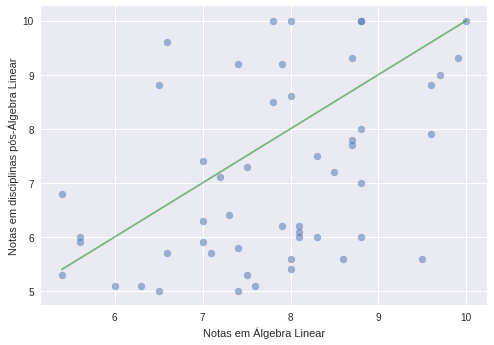

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


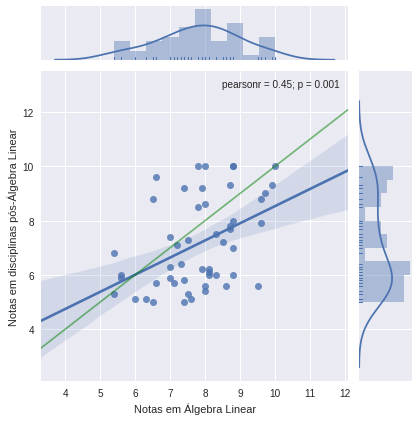

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

mask_apr = res['descricao'].str.contains('aprovado', case=False)
mask_apr
x_apr = res[mask_apr]['media_final_x']
y_apr = res[mask_apr]['media_final_y']
#x_rep = res[~mask_apr]['media_final_x']
#y_rep = res[~mask_apr]['media_final_y']

plt.scatter(x_apr, y_apr, alpha=0.5)
#plt.scatter(x_rep, y_rep, color='r', alpha=0.5)
plt.xlabel('Notas em Álgebra Linear')
plt.ylabel('Notas em disciplinas pós-Álgebra Linear')
plt.scatter
plt.plot([min(x_apr), max(x_apr)], [min(x_apr), max(x_apr)], color='g', alpha=0.5)
plt.show()

ax = sns.jointplot(x_apr, y_apr, marginal_kws=dict(bins=10, rug=True), kind='reg')
ax.set_axis_labels('Notas em Álgebra Linear', 'Notas em disciplinas pós-Álgebra Linear')
plt.plot([3, 13], [3, 13], color='g', alpha=0.5)
plt.show()

# Geração de Gráficos: Proporção

Esse gráfico é semelhante ao anterior, mas o eixo y indica a proporção entre as notas. Ou seja, `(nota de outras diciplinas) / (nota Álgebra Linear)`.

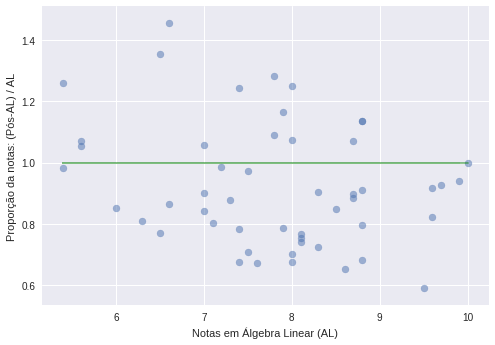

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


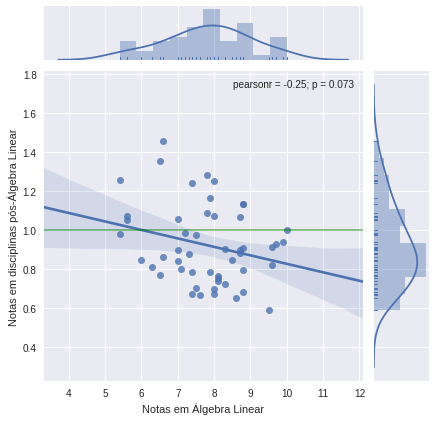

In [0]:
ratio_apr = y_apr / x_apr
#ratio_rep = y_rep / x_rep

plt.scatter(x_apr, ratio_apr, alpha=0.5)
#plt.scatter(x_rep, ratio_rep, alpha=0.5, color='r')
plt.xlabel('Notas em Álgebra Linear (AL)')
plt.ylabel('Proporção da notas: (Pós-AL) / AL')
plt.plot(x_apr, [1] * len(x_apr), color='g', alpha=0.5)
plt.show()

ax = sns.jointplot(x_apr, ratio_apr, marginal_kws=dict(bins=10, rug=True), kind='reg')
ax.set_axis_labels('Notas em Álgebra Linear', 'Notas em disciplinas pós-Álgebra Linear')
#plt.plot(x_apr, [1] * len(x_apr), color='g', alpha=0.5)
plt.plot([3, 13], [1, 1], color='g', alpha=0.5)
plt.show()

# Geração de Gráficos
Conta as proporções, dividindo-as em três classes: menores, iguais e maiores que um. Ou seja, aqueles que tiraram um nota menor em disciplinas dependentes do que em Álgebra linear, igual ou maior.

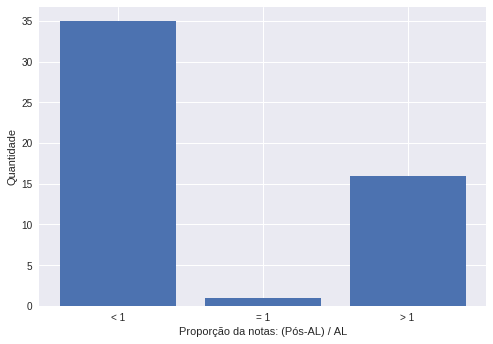

<1: 35
=1: 1
>1: 16


In [0]:
lt = ratio_apr[ratio_apr < 1].count()
eq = ratio_apr[ratio_apr == 1].count()
gt = ratio_apr[ratio_apr >= 1].count()
plt.bar([0, 1, 2], [lt, eq, gt])
plt.xticks([0, 1, 2], ['< 1', '= 1', '> 1'])
plt.xlabel('Proporção da notas: (Pós-AL) / AL')
plt.ylabel('Quantidade')
plt.show()

print('<1: ' + str(lt))
print('=1: ' + str(eq))
print('>1: ' + str(gt))

# Geração de grafos:
Histograma de proporção

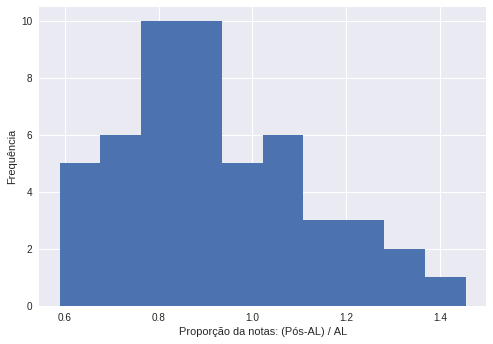

In [0]:
plt.hist(ratio_apr, bins=10)
plt.xlabel('Proporção da notas: (Pós-AL) / AL')
plt.ylabel('Frequência')
plt.show()

# Geração de Gráficos: Análise temporal
Separa as proporções nas notas considerando o tempo (em períodos) entre cursar uma disciplina dependente e a disciplina base.

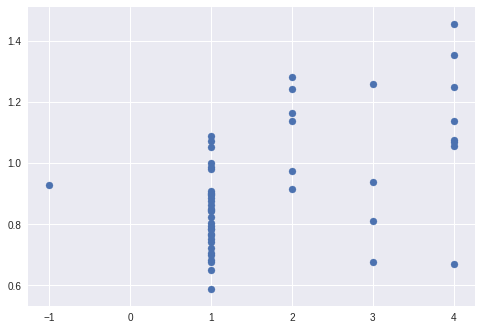

In [0]:
#analyse notes regarding time
res = res[mask_apr]
ratio = res['media_final_y'] / res['media_final_x']
plt.scatter(res['time_delta'], ratio)
plt.show()

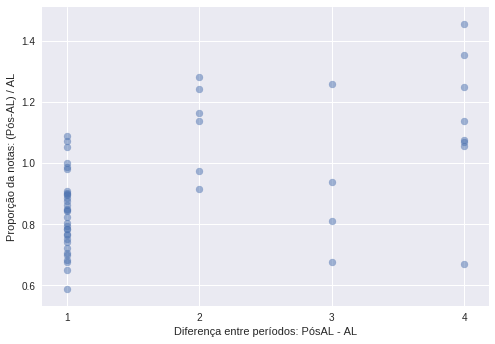

1    32
4     8
2     6
3     4
Name: time_delta, dtype: int64


In [0]:
#removes invalid values
res = res[res['time_delta'] > 0]
x = res['media_final_x']
y = res['media_final_y']
ratio = y / x

plt.xticks(res['time_delta'].unique().tolist())

plt.xlabel('Diferença entre períodos: PósAL - AL')
plt.ylabel('Proporção da notas: (Pós-AL) / AL')

plt.scatter(res['time_delta'], ratio, alpha=0.5)
plt.show()

print(res['time_delta'].value_counts())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


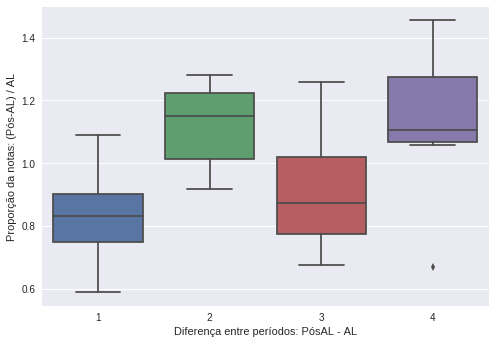

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


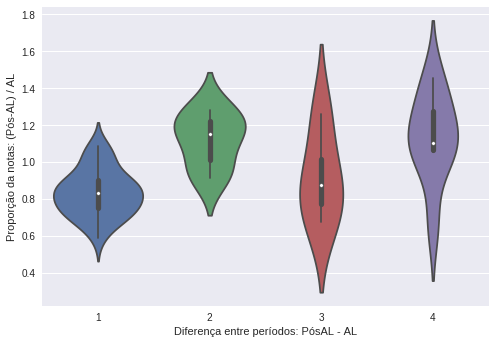

In [0]:
ax = sns.boxplot(res['time_delta'], ratio)
ax.set(xlabel='Diferença entre períodos: PósAL - AL', ylabel='Proporção da notas: (Pós-AL) / AL')
plt.show()

ax = sns.violinplot(res['time_delta'], ratio)
ax.set(xlabel='Diferença entre períodos: PósAL - AL', ylabel='Proporção da notas: (Pós-AL) / AL')
plt.show()